In [1]:
import json
import tweepy 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Dependencies
import tweepy
import json
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
sentiments = []
for news in ["BBC","CBS","CNN","FoxNews","nytimes"]:
#for news in ["BBC"]:
    count = 0;
    for x in range(1,6):
        public_tweets = api.user_timeline(news,page = x)
        for tweet in public_tweets:
            count = count+1
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            sentiments.append({"Source": tweet["user"]["name"],
                            "Text": tweet["text"], 
                            "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets Ago": count})

sentiments_df = pd.DataFrame(sentiments)


In [11]:
sentiments_df

,Compound,Date,Negative,Neutral,Positive,Source,Text,Tweets Ago
0,0.7096,Tue Oct 30 19:54:03 +0000 2018,0.000,0.718,0.282,BBC,💖 Japan’s Princess Ayako has surrendered her r...,1
1,0.0258,Tue Oct 30 19:06:04 +0000 2018,0.101,0.741,0.159,BBC,Sid is one of the growing number of women who ...,2
2,0.0000,Tue Oct 30 18:09:02 +0000 2018,0.000,1.000,0.000,BBC,🦌 Not everyone is slowing down as the days get...,3
3,0.0000,Tue Oct 30 17:02:06 +0000 2018,0.000,1.000,0.000,BBC,I'm old at heart 🤷‍♀️\nhttps://t.co/D5USf6s83x,4
4,0.0772,Tue Oct 30 16:25:13 +0000 2018,0.000,0.949,0.051,BBC,RT @BBCCiN: Last night on the @BBCTheOneShow w...,5
5,0.0000,Tue Oct 30 14:08:02 +0000 2018,0.000,1.000,0.000,BBC,We live in a society where we are constantly t...,6
6,0.8860,Tue Oct 30 13:03:03 +0000 2018,0.000,0.551,0.449,BBC,"You haVe to be Very, Very, Very cleVer to solV...",7
7,0.7430,Tue Oct 30 12:01:05 +0000 2018,0.065,0.687,0.247,BBC,😂 @RitaOra as @PostMalone is 🙌\n\nThe celebrit...,8
8,0.0000,Tue Oct 30 11:09:15 +0000 2018,0.000,1.000,0.000,BBC,Venice under water as Italy hit by fierce wind...,9
9,-0.4767,Tue Oct 30 10:20:56 +0000 2018,0.245,0.659,0.095,BBC,RT @BBCTwo: Could Grenfell have been avoided? ...,10


In [12]:
sentiments_df.to_csv("tweets.csv")

In [13]:
bbc = sentiments_df[sentiments_df["Source"]=="BBC"]
cbs = sentiments_df[sentiments_df["Source"]=="CBS"]
cnn = sentiments_df[sentiments_df["Source"]=="CNN"]
fox = sentiments_df[sentiments_df["Source"]=="Fox News"]
nytimes = sentiments_df[sentiments_df["Source"]=="The New York Times"]

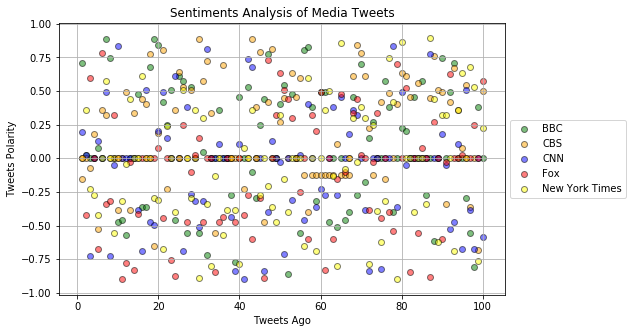

In [15]:
#sns.set_style("darkgrid")
              
figure = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.scatter(x = bbc["Tweets Ago"], y=bbc["Compound"], c="green", label = "BBC", edgecolor="black", alpha=0.5)
ax.scatter(x = cbs["Tweets Ago"], y=cbs["Compound"], c="orange", label = "CBS", edgecolor="black", alpha=0.5)
ax.scatter(x = cnn["Tweets Ago"], y=cnn["Compound"], c="blue", label = "CNN", edgecolor="black", alpha=0.5)
ax.scatter(x = fox["Tweets Ago"], y=fox["Compound"], c="red", label = "Fox", edgecolor="black", alpha=0.5)
ax.scatter(x = nytimes["Tweets Ago"], y=nytimes["Compound"], c="yellow", label = "New York Times", edgecolor="black", alpha=0.5)

ax.set_xlabel("Tweets Ago")
ax.set_ylabel("Tweets Polarity")
ax.set_title("Sentiments Analysis of Media Tweets")
ax.grid(True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("Sentiments_Analysis.png")
plt.show()